# Integral Paralela

![](https://github.com/carabedo/ci_mutual/blob/main/theo2002/descarga.jpeg?raw=true)

In [1]:
import pandas as pd
from scipy import integrate
from scipy import special
import numpy as np
import math
import matplotlib.pyplot as plt


from numpy import cos
from numpy import sin
from numpy import sinh
from numpy import cosh
from numpy import exp
from numpy import pi

In [42]:
#bob paralela
x0=2e-3;
y0=4e-3;
c=2e-3;
l1=0.5e-3
l2=2.5e-3
z1=0.5e-3
z2=2.5e-3
N=400;
L0=980e-6
mu0=4*np.pi*10e-7;
I=1e-3
f=100e3; #frec
w=2*np.pi*f;
mur=1;
sigma=35.4e6;
z=0


In [25]:
# fava

k=lambda u,v : np.sqrt(u**2+v**2)
l=lambda u,v : np.sqrt(u**2+v**2 + 1j*w*mur*mu0*sigma)

# ec 8
fl=lambda u,v : (2*k(u,v)*mur*np.exp(l(u,v)*z))/(k(u,v)*mur+l(u,v))

# 

def K(u,v):
    return (mu0*I*Aii(u,v)*(np.exp(-k(u,v)*z1) -np.exp(-k(u,v)*z2) ))/(2*np.pi**2*(z2-z1)*c*u*v*k(u,v)**2)

# ec 16:
def Aii(u,v):
    if u==v:
        res=c*cos(u*(x0 -y0))/2 - sin(u*(2*c+x0+y0))/(4*u) - sin(u*(x0+y0))/(4*u)
    else:
        r0=  (sin(c*(u-v)+ u*x0 - v*y0) - sin(u*x0 - v*y0) )/(2*(u-v))    

        r1=  (sin(c*(u+v)+ u*x0 + v*y0) - sin(u*x0 + v*y0))/(2*(u+v)) 

        res= r0 - r1
    return res


In [47]:
xm=20e-3;
nx=30
xv=np.linspace(-xm,xm,nx)
yv=np.linspace(-xm,xm,nx)
Jx=np.zeros([nx,nx])
Jy=np.zeros([nx,nx])


def intx(v,u):
    return np.real( (  w*sigma*K(u,v)*fl(u,v)*v*exp(1j*(u*x+v*y))) )
  
def inty(v,u):
    return np.real( (  -w*sigma*K(u,v)*fl(u,v)*u*exp(1j*(u*x+v*y))) )

In [48]:
#integral de J (8 theo 2002)
#fava 

lim=500

for i,x in enumerate(xv):
    for  j,y in enumerate(yv):
        Jx[j,i]=integrate.dblquad(intx,-lim, lim+1,
                                  lambda u: -lim,
                                  lambda u: lim+1)[0]
        Jy[j,i]=integrate.dblquad(inty,-lim, lim+1,
                                  lambda u: -lim,
                                  lambda u: lim+1)[0]

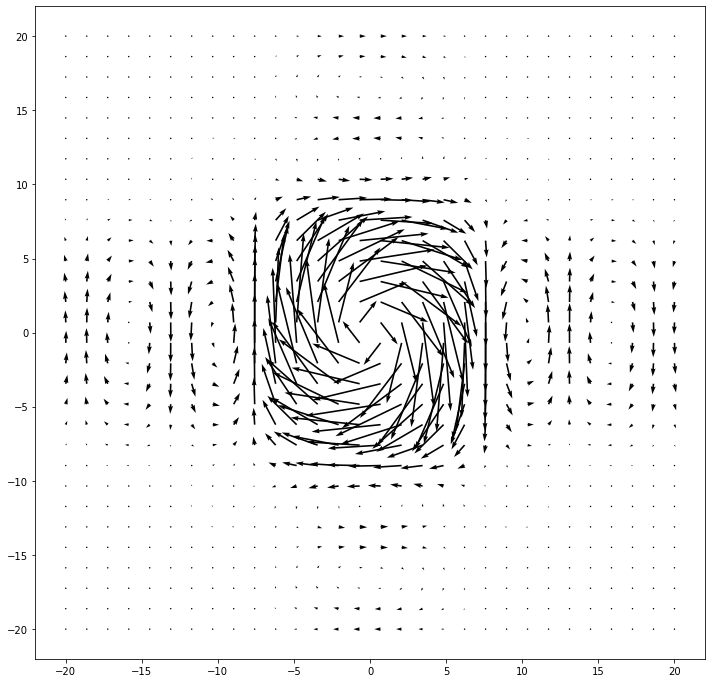

In [50]:
plt.figure(figsize=[12,12])
plt.quiver(xv*1e3,yv*1e3,Jx,Jy)


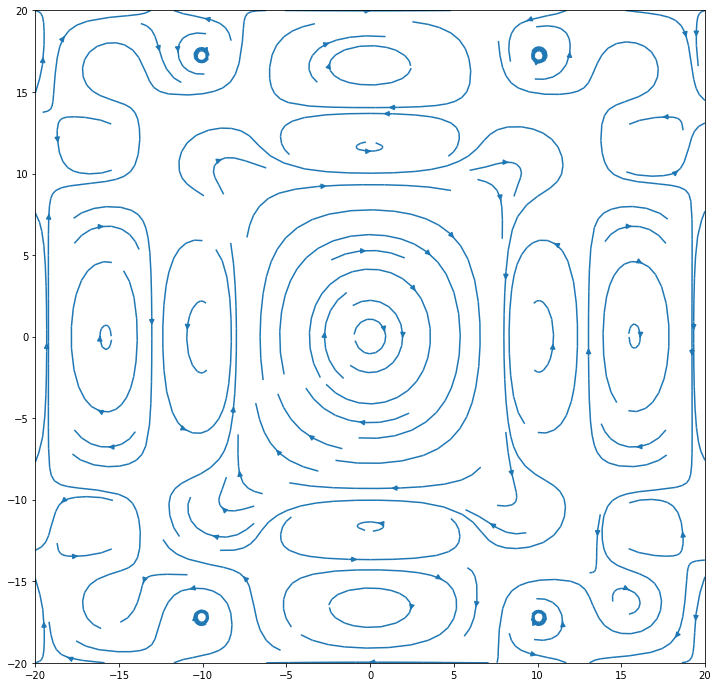

In [51]:
plt.figure(figsize=[12,12])
plt.streamplot(xv*1e3,yv*1e3,Jx,Jy)

# FFT Paralela


In [49]:
from numpy.fft import fft,ifft,fftshift,ifftshift,fftfreq
from numpy.fft import ifft2
from numpy.fft import fft2

def getk(t):
    N=len(t)
    dt=t[1]-t[0]
    k = fftfreq(N,d=dt)
    return fftshift(k)

def fintx(v,u):
    return np.real( (  w*sigma*K(u,v)*fl(u,v)*v) )
  
def finty(v,u):
    return np.real( (  -w*sigma*K(u,v)*fl(u,v)*u) )


In [93]:
#bob paralela
x0=10e-3;
y0=5e-3;
c=2e-3;
l1=0.5e-3
l2=2.5e-3
z1=0.5e-3
z2=2.5e-3
N=400;
L0=980e-6
mu0=4*np.pi*10e-7;
I=1e-3
f=100e3; #frec
w=2*np.pi*f;
mur=1;
sigma=35.4e6;
z=0

In [105]:
km=1500
Nk=60
av=np.linspace(-km,km+1,Nk);
bv=np.linspace(-km,km+1,Nk);
xv,yv=getk(av),getk(bv)

f=1000
z=0

ijx=np.zeros([Nk,Nk],dtype='complex')
ijy=np.zeros([Nk,Nk],dtype='complex')

for i,a in enumerate(av):
    for j,b in enumerate(bv):
          ijx[j,i] = fintx(a,b)
          ijy[j,i] = finty(a,b)
Jx,Jy=fftshift(ifft2(ifftshift(ijx))),fftshift(ifft2(ifftshift(ijy)))

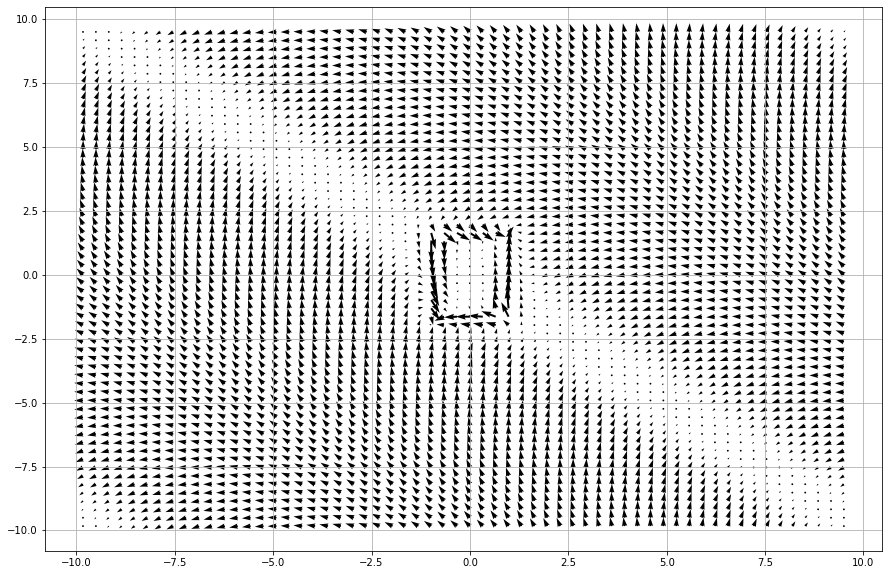

In [107]:
plt.figure(figsize=[15,10])
plt.quiver(xv*1e3,yv*1e3,Jx,Jy)
plt.grid(True)